In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore") 

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='BTMXDUS_GIgfPDfglXgp8sp03i2Vknj3waWFtnFU-R27',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'waterqualityprediction-donotdelete-pr-ola6ty8nuyxxxh'
object_key = 'Clean_water_data.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df= pd.read_csv(body)
df.head()


,Unnamed: 0,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year,WQI,WQI clf
0,0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,1.8965,0.1,11.0,27.0,2014.0,63.778321,1
1,1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0000,0.2,4953.0,8391.0,2014.0,175.363506,0
2,2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7000,0.1,3243.0,5330.0,2014.0,126.135831,0
3,3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8000,0.5,5382.0,8443.0,2014.0,195.105659,0
4,4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9000,0.4,3428.0,5500.0,2014.0,141.393246,0


In [3]:
df.columns

Index(['Unnamed: 0', 'STATION CODE', 'LOCATIONS', 'STATE', 'Temp', 'DO', 'PH',
       'Conductivity', 'BOD', 'NI', 'Fec_col', 'Tot_col', 'year', 'WQI',
       'WQI clf'],
      dtype='object')

In [4]:
df.shape

(1857, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1857 entries, 0 to 1856
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1857 non-null   int64  
 1   STATION CODE  1857 non-null   int64  
 2   LOCATIONS     1857 non-null   object 
 3   STATE         1857 non-null   object 
 4   Temp          1857 non-null   float64
 5   DO            1857 non-null   float64
 6   PH            1857 non-null   float64
 7   Conductivity  1857 non-null   float64
 8   BOD           1857 non-null   float64
 9   NI            1857 non-null   float64
 10  Fec_col       1857 non-null   float64
 11  Tot_col       1857 non-null   float64
 12  year          1857 non-null   float64
 13  WQI           1857 non-null   float64
 14  WQI clf       1857 non-null   int64  
dtypes: float64(10), int64(3), object(2)
memory usage: 217.7+ KB


Drop unrevelant features

In [6]:
df.drop(['Unnamed: 0','STATION CODE','LOCATIONS','STATE','year'],axis=1,inplace=True)

In [7]:
df.isnull().sum()

Temp            0
DO              0
PH              0
Conductivity    0
BOD             0
NI              0
Fec_col         0
Tot_col         0
WQI             0
WQI clf         0
dtype: int64

In [8]:
df['WQI clf'].value_counts()

0    877
1    691
2    286
3      3
Name: WQI clf, dtype: int64

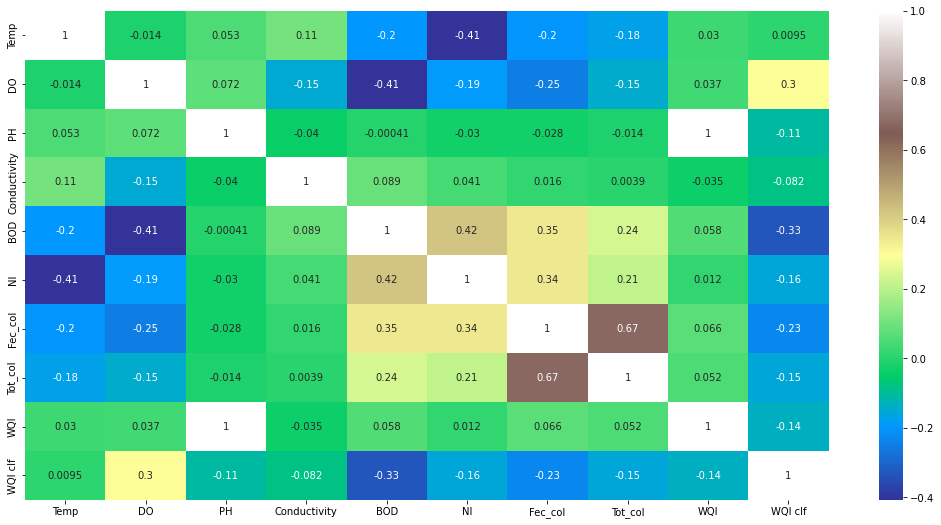

In [9]:
plt.figure(figsize=(18, 9))
sns.heatmap(df.corr(), annot=True, cmap='terrain')
plt.show()

In [10]:
df.drop(['WQI'],axis=1,inplace=True)

In [11]:
df.shape

(1857, 9)

### Split the x and y

In [12]:
x=df.drop(['WQI clf'],axis=1)

In [13]:
y=df['WQI clf']

In [14]:
x.shape,y.shape

((1857, 8), (1857,))

### Split the data into train and test

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=48)

In [17]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1485, 8), (372, 8), (1485,), (372,))

### Fit and Train the Model

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf=RandomForestClassifier()

In [20]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [21]:
prd=rf.predict(x_test)

In [22]:
prd

array([0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2,
       0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 1, 2, 0, 1, 0, 2, 1, 2, 0, 0, 0, 0, 1,
       1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 0, 2, 1, 1,
       1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0,
       2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 2,
       0, 1, 1, 2, 2, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 3, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 2,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1,
       0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2,

### Test the Model

In [23]:
rf.predict([[9.08,0.04,2.85,0.0,0.7,0.35,0.4,3.2]])

array([0])

### Measure the Performance Using Metrics

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [25]:
print(classification_report(y_test,prd))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       166
           1       0.82      0.89      0.85       148
           2       0.92      0.79      0.85        57
           3       1.00      1.00      1.00         1

    accuracy                           0.88       372
   macro avg       0.91      0.89      0.90       372
weighted avg       0.88      0.88      0.88       372



<AxesSubplot:>

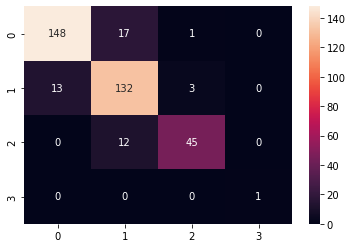

In [26]:
cm=confusion_matrix(y_test,prd)
sns.heatmap(cm,annot=True,fmt='g')

### Model Accuracy Score

In [27]:
print(accuracy_score(y_test,prd))

0.8763440860215054


### Save into pickle file

In [28]:
import pickle

In [29]:
pickle.dump(rf,open('water_model.pkl','wb'))

In [30]:
pwd

'/home/wsuser/work'

### Deployment

In [31]:
!pip install -U ibm-watson-machine-learning

In [32]:
from ibm_watson_machine_learning import APIClient
import json

### Authenticate and set space

In [34]:
wml_credentials= {
    "apikey":"X9BH8_luXhqLUK2JBaNEhlVZmVwd6jFZQCQmLIdd4Eqr",
    'url':"https://us-south.ml.cloud.ibm.com"
}

In [36]:
wml_client=APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------------------  ------------------------
ID                                    NAME                 CREATED
f15de0f5-b220-418f-9ffd-198dd648368f  Water Quality Model  2022-11-20T05:36:56.080Z
------------------------------------  -------------------  ------------------------


In [37]:
SPACE_ID = "f15de0f5-b220-418f-9ffd-198dd648368f"

In [39]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [41]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

### Save and Deploy the Model

In [42]:
import sklearn
sklearn.__version__

'1.0.2'

In [43]:
MODEL_NAME='WATER_QUALITY'
DEPLOYMENT_NAME='WATER_MODEL'
DEMO_MODEL= rf

Set Python Version

In [44]:
software_spec_udi = wml_client.software_specifications.get_id_by_name("runtime-22.1-py3.9")

Set Model meta

In [49]:
model_props={
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_udi
}

In [50]:
model_details = wml_client.repository.store_model(
            model=DEMO_MODEL,
            meta_props=model_props,
            training_data=x_train,
            training_target=y_train
)

Deployment creation failed. Error: 400. {"trace":"vq1qqs4epf2","errors":[{"code":"space_lacks_compute","message":"Space: f15de0f5-b220-418f-9ffd-198dd648368f is not associated with a WML instance which is mandatory for create_deployment operation"}]}


In [51]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'WQI clf',
  'schemas': {'input': [{'fields': [{'name': 'Temp', 'type': 'float64'},
      {'name': 'DO', 'type': 'float64'},
      {'name': 'PH', 'type': 'float64'},
      {'name': 'Conductivity', 'type': 'float64'},
      {'name': 'BOD', 'type': 'float64'},
      {'name': 'NI', 'type': 'float64'},
      {'name': 'Fec_col', 'type': 'float64'},
      {'name': 'Tot_col', 'type': 'float64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-20T06:14:07.487Z',
  'id': '5b67f59a-2ce9-4aeb-9b3c-0ee3672dae41',
  'modified_at': '2022-11-20T06:14:12.366Z',
  'name': 'WATER_QUALITY',
  'owner': 'IBMid-665002OW3P',
  'resource_key': '887a88f2-08d7-41d0-a22f-7b4fd10e6f05',
  'space_id': 'f15de0f5-b220-418f-9ffd-198dd648368f'},
 'system': {'warnings': []}}

In [52]:
model_id=wml_client.repository.get_model_id(model_details)

In [53]:
model_id

'5b67f59a-2ce9-4aeb-9b3c-0ee3672dae41'

Set meta

In [54]:
deployment_props={
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [55]:
deployment=wml_client.deployments.create(
    artifact_uid=model_id,
    meta_props=deployment_props
)

{"trace":"vq1qqs4epf2","errors":[{"code":"space_lacks_compute","message":"Space: f15de0f5-b220-418f-9ffd-198dd648368f is not associated with a WML instance which is mandatory for create_deployment operation"}]}


--------------------------
Deployment creation failed
--------------------------




WMLClientError: Deployment creation failed. Error: 400. {"trace":"vq1qqs4epf2","errors":[{"code":"space_lacks_compute","message":"Space: f15de0f5-b220-418f-9ffd-198dd648368f is not associated with a WML instance which is mandatory for create_deployment operation"}]}